# Sprint 6 - Análisis Exploratorio de Datos (Sesiones)

**Versión para estudiantes**

En el presente caso se busca aplicar los conocimientos adquiridos para el desarrollo de un primer tipo de análisis específico que todo analista o científico de datos debe realizar: **Análisis Exploratorio de Datos** (EDA por sus siglas en inglés). Este análisis tiene como propósito estudiar el comportamiento de indicadores o métricas específicas derivadas a partir de los datos disponibles, para lo cual emplea fundamentalmente dos herramientas:

* Estadística descriptiva: El área de la estadística enfocada en el resumen y presentación de variables a partir de valores.
* Visualización (lo cual ya lo has venido practicando en los capítulos anteriores).

Como puedes evidenciar, saber estadística te ayudará mucho en tu camino como analista o científico de datos. Te recomiendo por tanto que escuches este playlist sobre Fundamentos de Estadística creado por el canal StatQuest de Josh Starmer: https://youtube.com/playlist?list=PLblh5JKOoLUK0FLuzwntyYI10UQFUhsY9&si=fTrXd4SYsSvR_iVe.

## Entendimiento del contexto

El Banco Mundial es un organismo multinacional cuyo propósito es el brindar asistencia económica y financiera a sus estados asociados. Entre los servicios que ofrece se encuentra la de generar y publicar diversos indicadores macroeconómicos, sociales, demográficos y ambientales que permiten estudiar y contrastar la situación multidimensional entre países a través de los años. Si es de tu interés, puedes acceder a todo su catálogo de información en https://data.worldbank.org/.

Un dato importante para que tengas en cuenta es que a nivel mundial se reconocen poco más de 200 estados, de los cuales algunos proveen de información al Banco Mundial (estados miembro) y otros no lo hacen. La entidad si le es posible estima mediante modelos econométricos algunos de estos indicadores faltantes.

En este sentido, el Banco Mundial te ha contratado para que realices un análisis respecto al comportamiento de la variación del Producto Interno Bruto (PIB) entre los años 2000 y 2023. En concreto, esta entidad quiere que le asistas contestando las siguientes preguntas:

* ¿Cuál ha sido el comportamiento de este indicador en todo el período estudiado?
* ¿Qué variables inciden principalmente en los cambios a nivel de este indicador?
* ¿Qué tan probable es que un país tenga una recesión (reducción del PIB) en un año cualquiera?
* ¿Existen diferencias significativas en el crecimiento de países de "bajo desarrollo" frente a países de "alto desarrollo"?

## Entendimiento de los datos

La entidad te ha compartido la siguiente información en la que quiere que bases tu análisis:

* **cat_codpais3**: [264 filas, 2 columnas] Catálogo que contiene el nombre del país y sus siglas *Alpha-3* de acuerdo a la normativa ISO.
* **wb_ahorro**: [265, 25] Series anuales 2000 - 2023 por país respecto al porcentaje promedio de ahorro que mantienen los habitantes como porcentaje de su ingreso.
* **wb_crecimpib**: [265, 25] Series anuales 2000 - 2023 por país respecto a la tasa de variación del PIB.
* **wb_crecimpob**: [265, 25] Series anuales 2000 - 2023 por país respecto a la tasa de variación de la población.
* **wb_poburbana**: [265, 25] Series anuales 2000 - 2023 por país respecto al porcentaje de la población que reside en áreas urbanas.

Vale señalar que cada uno de estos dataframes se encuentra en formato *csv*.

Antes que nada vale que importes las librerías que vas a utilizar, esto es **pandas**, **numpy** y **matplotlib**.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Vamos a importar además una librería llamada **Warnings**. Investiga para qué sirve esta librería y qué hace el siguiente código.

```py
import warnings
warnings.filterwarnings("ignore")
```

In [2]:
import warnings
warnings.filterwarnings("ignore")

Carga ahora los datos de todos los dataframes disponibles.

In [3]:
cat_pais = pd.read_csv("/content/cat_codpais3.csv", sep = ",")
df_ahorro = pd.read_csv("/content/wb_ahorro.csv")
df_pib = pd.read_csv("/content/wb_crecimpib.csv")
df_poblacion = pd.read_csv("/content/wb_crecimpob.csv")
df_urbana = pd.read_csv("/content/wb_poburbana.csv")

Crea una función que te permita mirar:

* La estructura general del dataset.
* Una muestra aleatoria de 5 filas en la que se presenten solamente las primeras 5 columnas del dataset.
* Un conteo de los duplicados existentes.

In [6]:
def fun_diagnostico (df):
    print("ESTRUCTURA GENERAL DE LA TABLA:")
    print(df.info())
    print("\n")
    print("MUESTRA DE LOS DATOS: ")
    print(df.sample(5).iloc[:,:5])
    print("\n")
    print(f"FILAS DUPLICADAS: {df.duplicated().sum()}")

Aplica la función creada en cada uno de los datasets del Banco Mundial.

In [7]:
fun_diagnostico(cat_pais)

ESTRUCTURA GENERAL DE LA TABLA:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country_code  214 non-null    object
 1   country_name  214 non-null    object
dtypes: object(2)
memory usage: 3.5+ KB
None


MUESTRA DE LOS DATOS: 
   country_code     country_name
48          CYP           Chipre
78          GTM        Guatemala
96          JPN            Japon
90          IRQ             Iraq
49          CZE  Republica Checa


FILAS DUPLICADAS: 0


In [8]:
fun_diagnostico(df_ahorro)

ESTRUCTURA GENERAL DE LA TABLA:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Code  265 non-null    object 
 1   2000          161 non-null    float64
 2   2001          160 non-null    float64
 3   2002          167 non-null    float64
 4   2003          169 non-null    float64
 5   2004          169 non-null    float64
 6   2005          187 non-null    float64
 7   2006          190 non-null    float64
 8   2007          195 non-null    float64
 9   2008          196 non-null    float64
 10  2009          198 non-null    float64
 11  2010          200 non-null    float64
 12  2011          201 non-null    float64
 13  2012          204 non-null    float64
 14  2013          204 non-null    float64
 15  2014          206 non-null    float64
 16  2015          207 non-null    float64
 17  2016          205 non-null    float64
 18

In [9]:
fun_diagnostico(df_pib)

ESTRUCTURA GENERAL DE LA TABLA:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Code  265 non-null    object 
 1   2000          246 non-null    float64
 2   2001          247 non-null    float64
 3   2002          247 non-null    float64
 4   2003          251 non-null    float64
 5   2004          251 non-null    float64
 6   2005          251 non-null    float64
 7   2006          251 non-null    float64
 8   2007          252 non-null    float64
 9   2008          252 non-null    float64
 10  2009          255 non-null    float64
 11  2010          255 non-null    float64
 12  2011          255 non-null    float64
 13  2012          255 non-null    float64
 14  2013          255 non-null    float64
 15  2014          256 non-null    float64
 16  2015          256 non-null    float64
 17  2016          255 non-null    float64
 18

In [10]:
fun_diagnostico(df_poblacion)

ESTRUCTURA GENERAL DE LA TABLA:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Code  265 non-null    object 
 1   2000          264 non-null    float64
 2   2001          264 non-null    float64
 3   2002          264 non-null    float64
 4   2003          264 non-null    float64
 5   2004          264 non-null    float64
 6   2005          264 non-null    float64
 7   2006          264 non-null    float64
 8   2007          264 non-null    float64
 9   2008          264 non-null    float64
 10  2009          264 non-null    float64
 11  2010          264 non-null    float64
 12  2011          264 non-null    float64
 13  2012          264 non-null    float64
 14  2013          264 non-null    float64
 15  2014          264 non-null    float64
 16  2015          264 non-null    float64
 17  2016          264 non-null    float64
 18

In [11]:
fun_diagnostico(df_urbana)

ESTRUCTURA GENERAL DE LA TABLA:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Code  265 non-null    object 
 1   2000          262 non-null    float64
 2   2001          262 non-null    float64
 3   2002          262 non-null    float64
 4   2003          262 non-null    float64
 5   2004          262 non-null    float64
 6   2005          262 non-null    float64
 7   2006          262 non-null    float64
 8   2007          262 non-null    float64
 9   2008          262 non-null    float64
 10  2009          262 non-null    float64
 11  2010          262 non-null    float64
 12  2011          262 non-null    float64
 13  2012          262 non-null    float64
 14  2013          262 non-null    float64
 15  2014          262 non-null    float64
 16  2015          262 non-null    float64
 17  2016          262 non-null    float64
 18

Hagamos ahora un experimento, filtra los datos de variación del PIB de Estados Unidos (USA) de los años 2013 a 2019. Guarda estos datos en una variable.

In [15]:
pib_usa = df_pib.loc[df_pib["Country Code"] == "USA","2013":"2019"]
pib_usa

,2013,2014,2015,2016,2017,2018,2019
251,2.11783,2.52382,2.94555,1.819451,2.457622,2.966505,2.467038


Intenta ahora graficar estos datos con el método `plot` como usualmente lo has venido haciendo.

<Axes: >

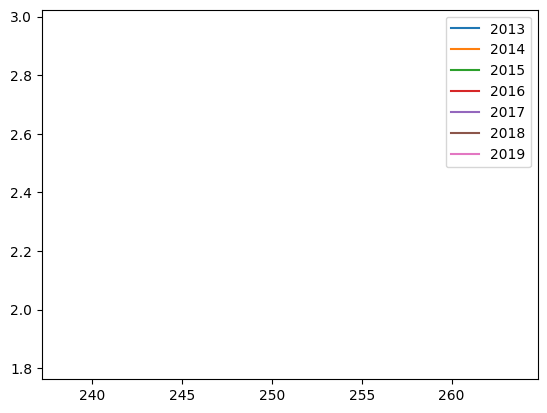

In [16]:
pib_usa.plot()

En cuanto a estos resultados notemos dos puntos importantes:

* Por una parte, el filtrado no es tan natural como usualmente lo hacemos. De hecho resultaría imposible en este punto responder esta pregunta usando el método `query`.
* Además no es posible graficar de forma directa y sencilla con el método `plot`.

Esto se explica porque el dataset **df_pib** (y todos los demás con excepción de **cat_pais**) es **ANCHO**. Un dataset ancho es aquel en que cada fila representa a una única entidad (en este caso un país) que no se repite en otras filas. Su utilidad radica en que esta presentación de datos es fácil de interpretar por usuarios "no analíticos", justamente porque se puede acceder a la totalidad información de cada entidad de forma rápida y directa.

Sin embargo, para usuarios "analíticos" como nosotros esta presentación no es adecuada, pues nosotros queremos tablas **LARGAS**. En una tabla larga cada fila representa una observación (o lo que es lo mismo un dato) con sus diferentes variables y particularidades, y facilita en consecuencia la manipulación y visualización de información.

Visto todo esto, define tu plan de acción para preparar estos datos.

**PLAN DE ACCIÓN PARA PREPARACIÓN DE DATOS**

* La tabla **cat_pais** no presenta novedades por lo que se debe mantener en su estado actual.
* Para las demás tablas:
    * Es necesario transformar su presentación para que sean tablas *largas* que permitan su uso analítico.
    * Los nombres de las columnas deben ajustarse a formato *snake_case*.
    * Hemos evidenciado que existen valores perdidos en los diferentes datasets, sin embargo dado el contexto puede que estos respondan en a diferentes situación dependiendo del país al cual se corresponden (i.e países sin ningún valor, países con un pequeño número de casos ausentes, etc.). Se debe por tanto tomar una decisión sobre como tratarlos una vez que sea posible filtrar esta información fácilmente.
* Una vez realizados estos pasos, conviene unir todos los datasets en una única tabla consolidada.

## Preparación de datos

Vamos a empezar con **df_pib**. Transforma la presentación ancha de esta tabla a una de tipo *larga* aplicando el método `melt` o la función `wide_to_long`.

In [17]:
df_pib = df_pib.melt(
    var_name = "year",
    value_name = "value",
    id_vars = "Country Code"
)

fun_diagnostico(df_pib)

ESTRUCTURA GENERAL DE LA TABLA:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6360 entries, 0 to 6359
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Code  6360 non-null   object 
 1   year          6360 non-null   object 
 2   value         6051 non-null   float64
dtypes: float64(1), object(2)
memory usage: 149.2+ KB
None


MUESTRA DE LOS DATOS: 
     Country Code  year      value
5252          SSF  2019   2.659745
6056          SYC  2022  14.976851
1307          UGA  2004   6.807233
835           CHN  2003  10.038030
2471          GMB  2009   6.665724


FILAS DUPLICADAS: 0


Ajusta los nombres de las columnas para que estos sigan el formato *snake_case*.

In [19]:
nombres = df_pib.columns
nombres_clean = []
for n in nombres:
  nombres_clean.append(n.lower().replace(" ","_"))
nombres_clean

['country_code', 'year', 'value']

In [20]:
df_pib.columns = nombres_clean
fun_diagnostico(df_pib)

ESTRUCTURA GENERAL DE LA TABLA:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6360 entries, 0 to 6359
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  6360 non-null   object 
 1   year          6360 non-null   object 
 2   value         6051 non-null   float64
dtypes: float64(1), object(2)
memory usage: 149.2+ KB
None


MUESTRA DE LOS DATOS: 
     country_code  year     value
3943          THA  2014  0.984469
4041          ECU  2015  0.119692
602           ETH  2002  1.514726
3981          AND  2015  1.434140
1524          PYF  2005  0.309973


FILAS DUPLICADAS: 0


In [30]:
df_pib["year"] = df_pib["year"].astype(int)
pib_usa = df_pib[df_pib["country_code"] == "USA"]
pib_usa =pib_usa[(pib_usa["year"] >= 2013) & (pib_usa["year"] <= 2019)]
pib_usa

,country_code,year,value
3696,USA,2013,2.117830
3961,USA,2014,2.523820
4226,USA,2015,2.945550
4491,USA,2016,1.819451
4756,USA,2017,2.457622
5021,USA,2018,2.966505
5286,USA,2019,2.467038


<Axes: >

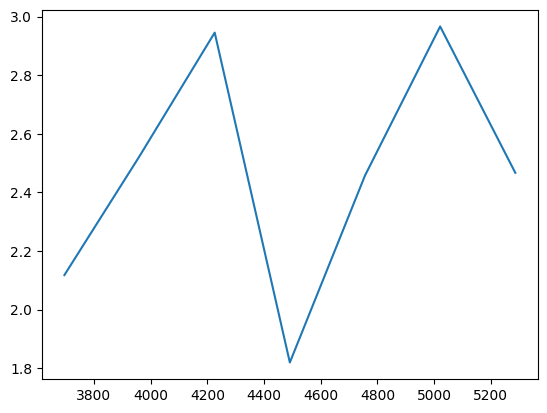

In [32]:
df_pib.query("country_code == 'USA' and 2013 <= year <= 2019")["value"].plot()

<Axes: >

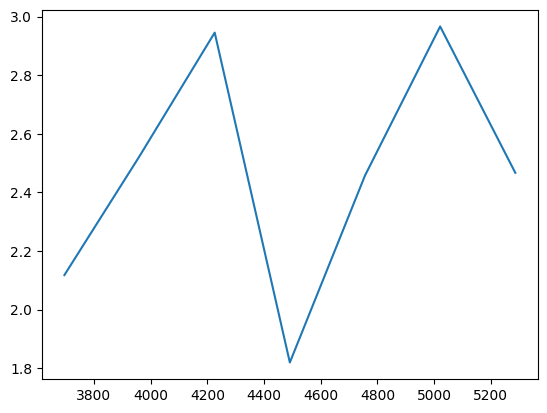

In [28]:
pib_usa["value"].plot()

Ya podemos estudiar los valores perdidos con esta tabla *larga*. Identifica diferentes tipologías de países en función de cuántos valores ausentes tengan.

Podríamos dividir a los países en 2 grupos en base a sus valores ausentes:

* Aquellos que tienen menos de un 20% (aprox. 5) de años sin valores.
* El resto que posee más del 20% de valores perdidos.

Para el último caso que correspondería a los países con pocos o ningún dato relevante, elimina todos estos registros pues su información está limitada pudiendo distorsionar los análisis.

Para el primer caso, en donde existen muchos datos relevantes, aplica una imputación por el valor mediano de dicho país considerando que esto no alterará significativamente los resultados de los análisis.

Concluye ejecutando los siguientes procedimientos de limpieza adicionales:

* Cambiar el tipo de variable de year a entero.
* Cambia el nombre de la columna value a algo más coherente con el contexto como *var_pib*.

Ahora bien, considera que este procedimiento debe repetirse exactamente igual en los datasets **df_ahorro**, **df_poblacion** y **df_urbana**. Haslo de forma **EFICIENTE**.

Consolida la información de estos 4 datasets en una sola tabla de tal forma que se mantengan todas las filas de **df_pib** puesto que allí se encuentra la variable más importante dado el contexto.

Incorpora ahora en esta información el nombre de los paises de forma que se garantice que no existan valores perdidos en la columna country_name.

## Análisis exploratorio de datos

Como ya se mencionó, el EDA busca estudiar el comportamiento de indicadores concretos mediante la aplicación de técnicas estadísticas y visualización. En este sentido conviene recordar que la principal métrica de interés en el contexto de este caso es la **variación del pib**, ante la cual se han planteado las siguientes preguntas:

* ¿Cuál ha sido el comportamiento de este indicador en todo el período estudiado?
* ¿Qué variables inciden principalmente en los cambios a nivel de este indicador?
* ¿Qué tan probable es que un país tenga una recesión en un año cualquiera?
* ¿Existen diferencias significativas en el crecimiento de países de "bajo desarrollo" frente a países de "alto desarrollo"?

### ¿Cuál ha sido el comportamiento de la variación en el PIB en todo el período estudiado?

Estudia la distribución del indicador mediante un resumen estadístico. Recuerda que la distribución de una variable hace referencia a sus siguientes características fundamentales:

1. Su nivel de centralidad.
2. Su grado de dispersión o volatilidad.
3. La existencia de valores atípicos.
4. La existencia de sesgos.  

Utiliza el criterio *3-sigma* para establecer el rango de variación de PIB de un país cualquiera con un 99% de confianza.

Complementa este resultado con un diagrama de cajón con bigotes.

Para una mejor visualización de la distribución, repite el gráfico excluyendo los valores atípicos.

Vale señalar que un valor se considera atípico si el mismo NO se encuentra dentro del intervalo

$$ \left[ Q_1 - 1.5(Q3-Q1),\; Q_3 + 1.5(Q3-Q1)\right]$$

donde $Q1$ es el primer cuartil y $Q3$ el tercero.

Complementa ahora este resultado con un histograma tal que cumplas con lo siguiente:

* Excluye del dataset los casos atípicos.
* Utiliza un número de columnas ($c$) pertinente para lo cual puedes utilizar la fórmula $c \approx \sqrt{n}$, donde $n$ es el número de observaciones no atípicas.

El histograma puede resumirse en un diagrama de densidad. Créalo.

Genera finalmente un gráfico con la evolución a través de los años de la variación en el PIB promedio mundial.

**CONCLUSIONES**

< Aquí tu respuesta >

### ¿Qué variables inciden principalmente en los cambios a nivel de este indicador?

Excluye del dataset los años 2009 y 2020 por ser especiales en cuanto a la situación mundial vivida en esos períodos.

Estudia el grado de correlación existente entre las distintas métricas que tienes disponibles. Recuerda que la correlación mide el grado de vinculación lineal existente entre un par de variables, tal que:

* Si su valor es cercano a -1, se dice que ambas variables mantiene una relación **inversamente proporcional**, esto es, cuando una se incrementa la otra disminuye.
* Si su valor es cercano a +1, se dice que ambas variables mantiene una relación **directamente proporcional**, esto es, cuando una se incrementa la otra igualmente aumenta.
* Si su valor es cercano a 0, se dice que ambas variables no tienen relación estadística alguna.

Repite el cálculo pero ahora utiliza los promedios anuales de cada indicador.

Visualiza la relación existente entre ahorro y var_pib mediante una gráfica de dispersión.

Visualiza ahora la relación existente entre pct_urbana y var_pib mediante una gráfica de dispersión.

**CONCLUSIONES**

< Aquí tu respuesta >

### ¿Qué tan probable es que un país tenga una recesión en un año cualquiera?

Crea una nueva columna en el dataset de forma que se evidencien los casos en los que han existido recesiones.

Calcula en cuántos casos del dataset han existido recesiones y guarda este resultado en una variable llamada `casos_exitosos`.

Guarda la totalidad de casos posibles en la variable `casos_totales`.

Calcula la probabilidad de que en un año cualquiera un país entre en recesión. Recuerda que una probabilidad se mide como la razón entre los casos de éxito (eventos en los que sucede algo que estamos queriendo medir) y los casos totales observados. Además, una probabilidad debe cumplir 3 condiciones:

1. Es positiva, es decir, todo evento *puede* suceder.
2. Es estrictamente menor o igual a 1, es decir, existen otros eventos *posibles*.
3. La suma de todas las probabilidades de eventos posibles en un experimento es igual a 1, es decir, alguno *debe* suceder.

Vale que notes que esta probabilidad obtenida podría calcularse de forma directa con el siguiente código:

```py
prob_recesion = df_sin_atipicos["es_recesion"].mean()
```

Piensa el porqué esto funciona.

Encuentra el top 10 de países con una mayor probabilidad de recesión.

**CONCLUSIONES**

* En promedio, un año malo en términos económicos para un país puede presentarse una vez por cada década. De manera consecuente se pueden esperar ciclos de alrededor de 9 años de crecimiento sostenido en las economías nacionales, ante lo cual las políticas de desarrollo e inversión pública y privada deberían alinearse a esta realidad observada para así garantizar que las variaciones positivas en el PIB sean las máximas posibles en estos años.
* Resalta que entre los 10 países con mayor probabilidad de recesión, 5 sean de la región del Caribe. Lo anterior, da cuenta de la necesidad para el Banco Mundial de fortalecer su  asistencia en esta zona geográfica. De igual manera otros 3 estados rankeados pertenecen a Oceanía que igualmente debería ser considerado en la planificación de actividades futuras de la entidad.

### ¿Existen diferencias en el crecimiento de países de "bajo desarrollo" frente a países de "alto desarrollo"?

Escoge 5 países que consideres de bajo desarrollo (i.e Ecuador, Bolivia, Guatemala, etc.), y 5 que consideres de alto desarrollo (i.e Estados Unidos, Alemania, Japón, etc.). Filtra el dataset de forma que solamente conserves estos países y adiciona una nueva columna que distinga a los dos grupos.  

Estudia comparativamente la distribución de var_pib en los países de alto y bajo desarrollo.

Los resultados aquí alcanzados parecerían indicar que en promedio la variación del PIB en países de bajo desarrollo es mayor a aquella de los países de alto desarrollo.

¿Cómo podemos estar completamente seguros de esta afirmación? La respuesta radica en la **Inferencia estadística**, cuyas técnicas nos permiten verificar hipótesis de forma objetiva y robusta. Investiga acerca de esta temática con enfoque en los siguientes conceptos:

* Pruebas de hipótesis
* Intervalos de confianza

**CONCLUSIONES**

< Aquí tu respuesta >